In [1]:
from flyingpigeon import weatherregimes as wr
from flyingpigeon import utils
from flyingpigeon.ocgis_module import call
from os import listdir, path ,getenv
import numpy as np
from datetime import datetime as dt

HOME = getenv('HOME')

In [2]:
#from flyingpigeon.datafetch import reanalyses as rl
#model_nc = rl(start=1998, end=int(2000), dataset='NCEP', variable='slp')

#model_nc.sort()
#model_nc 

In [3]:
# if the data are already fetched, just list the appropriate folder: 
p = HOME + '/.conda/envs/birdhouse/var/lib/cache/pywps/www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/ncep.reanalysis.dailyavgs/surface'
# p = HOME + '/.conda/envs/birdhouse/var/lib/cache/pywps/esgf1.dkrz.de/thredds/fileServer/cmip5/cmip5/output1/MPI-M/MPI-ESM-LR/historical/day/atmos/day/r1i1p1/v20111006/psl'
model_nc = [path.join(p,f) for f in listdir(p)]
model_nc.sort()

In [4]:
# define 'literalInput' : 

start = dt.strptime('1970-01-01', '%Y-%m-%d')
end = dt.strptime('2010-12-31', '%Y-%m-%d')
timeseries = [start,end]
splineperiod = [dt.strptime('1970-01-01', '%Y-%m-%d'), dt.strptime('1999-12-31', '%Y-%m-%d')]
season = {'month':[6,7,8]}
bbox=[-80,22.5,50,70]
variable = utils.get_variable(model_nc) #'psl'
# conform_units_to='hPa'

In [5]:
# extract appropriate data from dataset
model_subset = call(resource=model_nc,variable=variable,time_range=timeseries,
                    spatial_wrapping='wrap', geom=bbox, 
                   # conform_units_to=conform_units_to
                   )
print model_subset

./3b761812-3ea3-11e6-ad3b-f15fb5f072a3.nc


In [ ]:
# inputfile = '/home/estimr2/calvarez/birdhouse/slp.1948-2014_NA.nc'

In [8]:
# calculate the anomalie 
reload(wr)
model_anomal = wr.get_anomalies(model_subset, reference=splineperiod, frac=0.2)
print model_anomal

done for 0 - 50 
done for 1 - 50 
done for 2 - 50 
done for 3 - 50 
done for 4 - 50 
done for 5 - 50 
done for 6 - 50 
done for 7 - 50 
done for 8 - 50 
done for 9 - 50 
done for 10 - 50 
done for 11 - 50 
done for 12 - 50 
done for 13 - 50 
done for 14 - 50 
done for 15 - 50 
done for 16 - 50 
done for 17 - 50 
/homel/nhempel/birdhouse/flyingpigeon/notebooks/tmpJ48yHI.nc


In [10]:
# select season
model_season = call(model_anomal, time_region=season)
model_season

'./363ff598-3ea8-11e6-ad3b-f15fb5f072a3.nc'

In [2]:
ref_file = '/homel/nhempel/.conda/envs/birdhouse/var/lib/pywps/outputs/flyingpigeon/output_netcdf-bb07d158-3ece-11e6-9ac7-e3f908c03fff.nc'
r_path = '/homel/nhempel/.conda/envs/birdhouse/var/lib/cache/pywps/esgf1.dkrz.de/thredds/fileServer/cmip5/cmip5/output1/MPI-M/MPI-ESM-MR/historical/day/atmos/day/r1i1p1/v20120503/psl/' 
#/home/estimr2/EUCLEIA/gws-access.ceda.ac.uk/public/mohc_shared/EUCLEIA/MOHC/HadGEM3-A-N216/historical/r1i1p1/'
resource =  [path.join(r_path ,f) for f in listdir(r_path) if 'psl' in f]
resource.sort()

In [3]:
resource

['/homel/nhempel/.conda/envs/birdhouse/var/lib/cache/pywps/esgf1.dkrz.de/thredds/fileServer/cmip5/cmip5/output1/MPI-M/MPI-ESM-MR/historical/day/atmos/day/r1i1p1/v20120503/psl/psl_day_MPI-ESM-MR_historical_r1i1p1_19800101-19891231.nc',
 '/homel/nhempel/.conda/envs/birdhouse/var/lib/cache/pywps/esgf1.dkrz.de/thredds/fileServer/cmip5/cmip5/output1/MPI-M/MPI-ESM-MR/historical/day/atmos/day/r1i1p1/v20120503/psl/psl_day_MPI-ESM-MR_historical_r1i1p1_19900101-19991231.nc',
 '/homel/nhempel/.conda/envs/birdhouse/var/lib/cache/pywps/esgf1.dkrz.de/thredds/fileServer/cmip5/cmip5/output1/MPI-M/MPI-ESM-MR/historical/day/atmos/day/r1i1p1/v20120503/psl/psl_day_MPI-ESM-MR_historical_r1i1p1_20000101-20051231.nc']

In [6]:
lon, lat = utils.get_coordinates(ref_file)
start = dt.strptime('1980-12-01', '%Y-%m-%d')
end = dt.strptime('2005-12-30', '%Y-%m-%d')
time_range = [start,end]

pro_subset = call(resource=resource, time_range = time_range, # geom=[min(lat), min(lon), max(lat), max(lon)], #,
                 regrid_destination=ref_file, regrid_options='bil'
                 )
print pro_subset

ba7c5c82-3f9a-11e6-8fa8-25c1f77d80b4.nc


In [8]:
splineperiod=time_range
model_anomal = wr.get_anomalies(pro_subset, reference=splineperiod, frac=0.2)
print model_anomal

done for 0 - 50 
done for 1 - 50 
done for 2 - 50 
done for 3 - 50 
done for 4 - 50 
done for 5 - 50 
done for 6 - 50 
done for 7 - 50 
done for 8 - 50 
done for 9 - 50 
done for 10 - 50 
done for 11 - 50 
done for 12 - 50 
done for 13 - 50 
done for 14 - 50 
done for 15 - 50 
done for 16 - 50 
done for 17 - 50 
/homel/nhempel/birdhouse/flyingpigeon/notebooks/tmpxHaXDO.nc


In [12]:
model_season = wr.get_season(model_anomal, season='JJA')
model_season

'./6f412034-3fa1-11e6-8fa8-25c1f77d80b4.nc'

In [9]:
from tempfile import mkstemp
import statsmodels.api as sm
from numpy import tile

import matplotlib.pyplot as plt
%matplotlib inline

from cdo import Cdo
cdo = Cdo()


ip , nc_anomal = mkstemp(dir='.',suffix='.nc')
ip , nc_period = mkstemp(dir='.',suffix='.nc')

ip , nc_anual_cycle = mkstemp(dir='.',suffix='.nc')
# nc_period = cdo.selyear('1970/1999', input= model_subset, output=nc_period)
nc_anual_cycle = cdo.ydaymean(input= input_refper  , output=nc_anual_cycle) 
print nc_anual_cycle

### spline for smoothing
from netCDF4 import Dataset
variable = utils.get_variable(nc_anual_cycle)

ds = Dataset(nc_anual_cycle, mode='a')
vals = ds.variables[variable]

ts = vals.shape[0]
x = np.linspace(1, ts*3 , num=ts*3 , endpoint=True)
y = tile(vals[:,0,0], 3)

ds.close()

/homel/nhempel/birdhouse/flyingpigeon/notebooks/tmpDcXw7E.nc


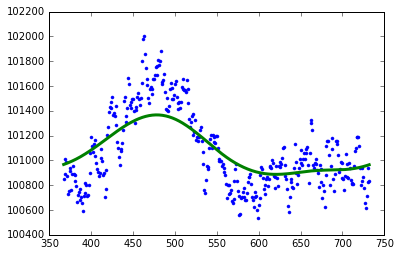

In [18]:
import statsmodels.api as sm
from numpy import tile

# x = np.linspace(0,2*np.pi,100)
# y = np.sin(x) + np.random.random(100) * 0.2

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

#x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
#y = np.sin(x)
#slp = interpolate.UnivariateSpline(x=x, y=y, k=3, s=2) # interpolate.UnivariateSpline(x, y, w=None, bbox=None, k=3, s=None, ext=0, check_finite=False)
#ys = slp(x)
#xnew = np.arange(0, 2*np.pi, np.pi/50)
#ynew = s(xnew)
#ys = savitzky_golay(y, window_size=91, order=2, deriv=0, rate=1)

ys = sm.nonparametric.lowess(y, x, frac=0.2)[:,1]

plt.plot(x[ts:ts*2], y[ts:ts*2], '.')
plt.plot(x[ts:ts*2], ys[ts:ts*2], lw=3)

#plt.plot(x, '.-')
#plt.plot(slp(x), lw=3)

In [14]:
an = y - ys # ys.max() - ys.min()
an.max() - an.min()

1217.9144682091865

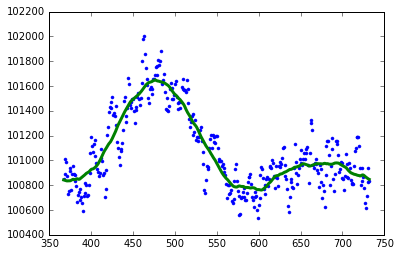

In [17]:
ys = savitzky_golay(y, window_size=121, order=2, deriv=0, rate=1)

plt.plot(x[ts:ts*2], y[ts:ts*2], '.')
plt.plot(x[ts:ts*2], ys[ts:ts*2], lw=3)

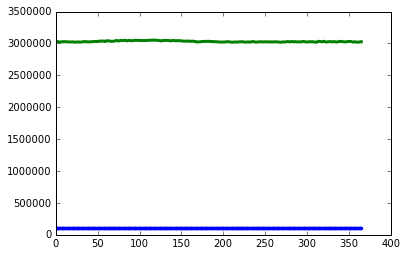

In [71]:
x = np.linspace(1, ts*3 , num=ts*3 , endpoint=True)
# slp = interpolate.UnivariateSpline(x=x, y=y, k=1, s=0.1)

ys = np.convolve(y, 30, mode='full')

# slp.set_smoothing_factor(1000)

plt.plot(y[ts:ts*2], '.-')
plt.plot(ys[ts:ts*2], lw=3)

In [ ]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
    
rpy2.robjects.numpy2ri.activate()
    
base = importr("base")
stats = importr("stats")

In [ ]:
ys = stats.spline(y)

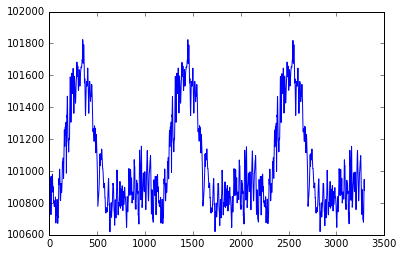

In [83]:
plt.plot(ys[1])
#plt.plot(ys[0])

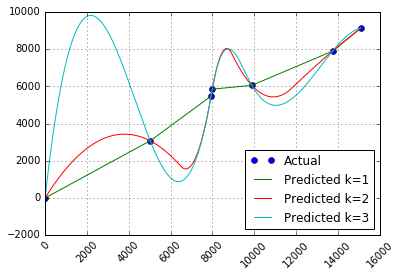

In [53]:
import scipy
import pylab

# Set up and plot actual data
x = [0, 5024.2059124920379, 7933.1645067836089, 7990.4664106277542, 9879.9717114947653, 13738.60563208926, 15113.277958924193]
y = [0.0, 3072.5653360000988, 5477.2689107965398, 5851.6866463790966, 6056.3852496014106, 7895.2332350173638, 9154.2956175610598]
pylab.plot(x, y, "o", label="Actual")

# Plot estimates using splines with a range of degrees
for k in range(1, 4):
    mySpline = scipy.interpolate.UnivariateSpline(x=x, y=y, k=k, s=2)
    xi = range(0, 15100, 20)
    yi = mySpline(xi)
    pylab.plot(xi, yi, label="Predicted k=%d" % k)

# Show the plot
pylab.grid(True)
pylab.xticks(rotation=45)
pylab.legend( loc="lower right" )
pylab.show()

In [13]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
     It has the advantage of preserving the original shape and
     features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
    the values of the time history of the signal.
  11     window_size : int
  12         the length of the window. Must be an odd integer number.
  13     order : int
  14         the order of the polynomial used in the filtering.
  15         Must be less then `window_size` - 1.
  16     deriv: int
  17         the order of the derivative to compute (default = 0 means only smoothing)
  18     Returns
  19     -------
  20     ys : ndarray, shape (N)
  21         the smoothed signal (or it's n-th derivative).
  22     Notes
  23     -----
  24     The Savitzky-Golay is a type of low-pass filter, particularly
  25     suited for smoothing noisy data. The main idea behind this
  26     approach is to make for each point a least-square fit with a
  27     polynomial of high order over a odd-sized window centered at
  28     the point.
  29     Examples
  30     --------
  31     t = np.linspace(-4, 4, 500)
  32     y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
  33     ysg = savitzky_golay(y, window_size=31, order=4)
  34     import matplotlib.pyplot as plt
  35     plt.plot(t, y, label='Noisy signal')
  36     plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
  37     plt.plot(t, ysg, 'r', label='Filtered signal')
  38     plt.legend()
  39     plt.show()
  40     References
  41     ----------
  42     .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
  43        Data by Simplified Least Squares Procedures. Analytical
  44        Chemistry, 1964, 36 (8), pp 1627-1639.
  45     .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
  46        W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
  47        Cambridge University Press ISBN-13: 9780521880688
  """
    import numpy as np
    from math import factorial
    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
         raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
         raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [37]:
interpolate.UnivariateSpline?

In [44]:
# select time and change units
#  conform_units_to=conform_units_to
model_season = call(resource=model_anomal,variable=variable, 
                    time_region = time_region,)
model_season

'./16ebb7c6-3a03-11e6-9568-93369ee9b73c.nc'

In [6]:
nc_model = wr.subset(model, bbox="-80,50,22.5,70", time_region='12,1,2', regrid_destination=nc_obs)

In [50]:
from flyingpigeon import weatherregimes as wr
reload(wr)
from flyingpigeon.visualisation import concat_images
from shutil import copyfile
from numpy import ma, mean 

from tempfile import mkstemp

In [51]:
ip , nc_anomal = mkstemp(dir='.',suffix='.nc')

file = '/home/estimr2/nhempelmann/ea4e5ea8-3df9-11e6-b034-0756a0266937.nc'

copyfile(file,nc_anomal)

In [52]:
nc_weighed = wr.weight_by_lat(nc_anomal)

In [53]:
nc_weighed

'/homel/nhempel/birdhouse/flyingpigeon/notebooks/tmpkgW9bE.nc'

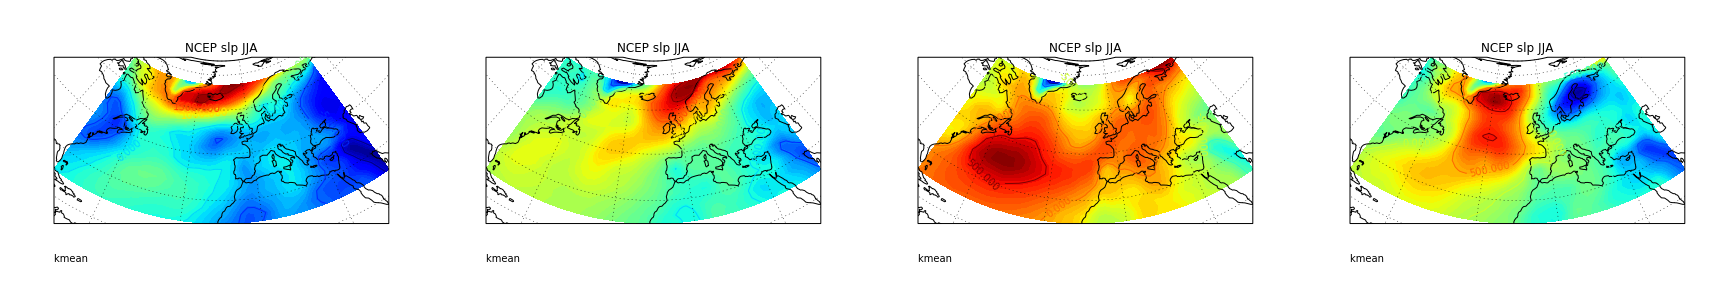

In [57]:
pca = wr.get_pca(nc_weighed)

centroids, distance, regime = wr.calc_kMEAN(pca)

lats, lons = utils.get_coordinates(nc_anomal)
data = utils.get_values(nc_anomal)

subplots = []
obs_pattern = []
pattern_reshape = []

for i in range(4):
    d_mask = ma.masked_array(distance[:,i], mask=(regime==i))
    best_pattern = d_mask.argsort()[0:10]
    pattern = mean(data[best_pattern], axis = 0)
    obs_pattern.append(pattern)
    if i == 0 : 
        m, n  = obs_pattern[0].shape
    pattern_reshape.append(np.reshape(pattern, (n*m)))
    subplots.append(plot_pressuremap(pattern,
    facecolor = '#E0E0E0',
    lats=lats, 
    lons=lons, 
    title='NCEP slp JJA' , 
    sub_title='kmean '))
#    regime_dic['NCEP']['weather regime %s' % i] = mean(data_ncep[best_pattern], axis = 0)

con_obs = concat_images(subplots, orientation='h')
Image(filename=con_obs)

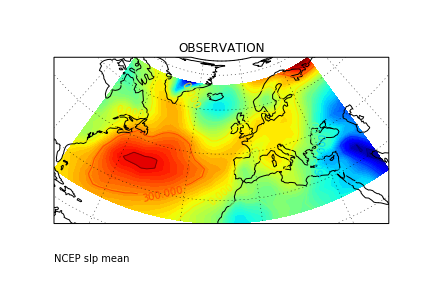

In [27]:
from IPython.display import Image
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline


def plot_pressuremap(data, lats=None, lons=None,
                    facecolor=None,  edgecolor=None,
                    title='Pressure Pattern', 
                    sub_title='plotted in birdhouse'):
    """
    plots pressure data
    :param data: 2D or 3D array of pressure data. if data == 3D a mean will be calculated
    :param lats: 1D or 2D array for latitude coordinates (geographcal map will be plotted if lats / lons are provided)
    :param lons: 1D or 2D array for longitude coordinates (geographcal map will be plotted if lats / lons are provided)
    :param title: string for title
    :param sub_title: string for sub_title
    """
    from numpy import squeeze, mean, meshgrid
    d = squeeze(data)

    if len(d.shape)==3:
        d = mean(d, axis=0)
      
    #fig = plt.figure( 
  
# fig.patch.set_facecolor(facecolor)
  
    if not (lats == None or lons == None):
        if len(lats.shape) == 1: 
            lons, lats = meshgrid( lons, lats)
        central_longitude = int(mean(lons))
    
    #AlbersEqualArea(central_longitude=0.0, central_latitude=0.0, false_easting=0.0, false_northing=0.0, standard_parallels=(20.0, 50.0), globe=None)
    
        ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=central_longitude), axisbg=facecolor) #,Robinson(central_longitude=central_longitude))
        ax.gridlines() 
        ax.coastlines()
    
        cf = plt.contourf(lons, lats, d, 60, transform=ccrs.PlateCarree(), cmap='jet', interpolation=None) #'nearest'
        co = plt.contour(lons, lats, d, transform=ccrs.PlateCarree(), lw=2, color='black')
    else:
        cf = plt.contourf(d)
        co = plt.contour(d, lw=2, c='black')
    
  # plt.colorbar(cf)
    plt.clabel(co, inline=1) # fontsize=10
    plt.title(title)
    plt.annotate(sub_title, (0,0), (0, -30), xycoords='axes fraction',
               textcoords='offset points', va='top')

    ip, image = mkstemp(dir='.',suffix='.png')
    plt.savefig(image)
    plt.close()

    return image

plot = plot_pressuremap(pattern,
    facecolor = '#E0E0E0',
    lats=lats, 
    lons=lons, 
    title='OBSERVATION' , 
    sub_title='NCEP slp mean')
Image(filename=plot)

In [72]:
plt.figure?

In [48]:
plt.axes?

/homel/nhempel/.conda/envs/birdhouse/lib/python2.7/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


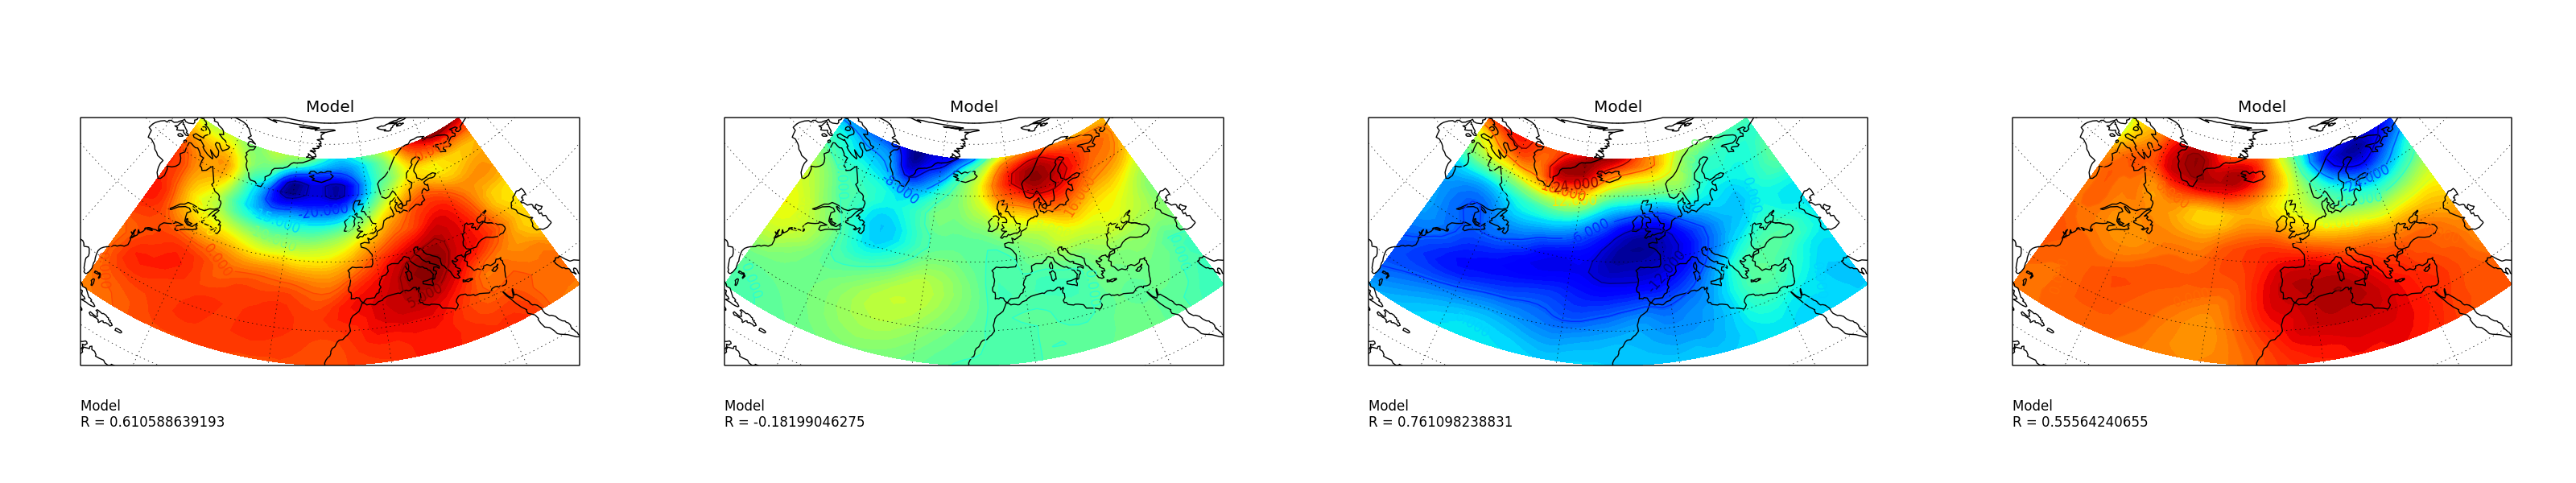

In [11]:
file = nc_model
pca = wr.get_pca(file)
centroids, distance, regime = wr.calc_kMEAN(pca)

lats, lons = utils.get_coordinates(file)
data = utils.get_values(file)

from scipy import stats

subplots = []

stat_vals = np.ones([4, 5]) * -1 
r_vals = np.ones([4]) * -1
order = np.ones([4]) * -1
model_pattern = []

for i in [0,1,2,3]:
    # get first 10 clostest patterns to the centroide
    d_mask = ma.masked_array(distance[:,i], mask=(regime==i))
    best_pattern = d_mask.argsort()[0:10]
    
    pattern = []
    pattern = mean(data[best_pattern], axis = 0)
    model_pattern.append(pattern)
    x = np.reshape(pattern, (n*m))
    pattern_reshape.append(np.reshape(pattern, (n*m)))
    
    #### compare with observation    
    for j in [0,1,2,3]:
        r_value = None
        y = np.reshape(obs_pattern[j], (n*m))
        alpha, beta, r_value, p_value, std_err = stats.linregress(x, y)
        
        # print 'model',i , 'obs', j
        if r_vals[j] <= r_value: #r_value >= stat_vals[j][2]:
            r_vals[j] = r_value
            #stat_vals[i,:] = [alpha, beta, r_value, p_value, std_err]
            order[j] = i
        
    subplots.append(plot_pressuremap(pattern,
    lats=lats, 
    lons=lons, 
    title='Model' , 
    sub_title='Model \nR = %s \n' % r_vals[i] ))

subplots_ordered = [subplots[int(i)] for i in order]
con = concat_images(subplots_ordered, orientation='h')
Image(filename=con)

In [54]:
ax.patch.set_fc

<bound method Rectangle.set_fc of <matplotlib.patches.Rectangle object at 0x7fb091aeff10>>

In [57]:
plt.show()